In [1]:
exec(defaults)
%matplotlib inline
from scipy.integrate import simps

In [2]:
def integrate_from_r0(integrand, rr, r0):
    # basic grid info
    nr = len(rr)
    ir0 = np.argmin(np.abs(rr - r0))

    # compute indefinite integral
    integral = np.zeros(nr)
    for ir in range(nr):
        # remember overall minus sign in simps from order of rr
        if ir <= ir0: # we are above r0, so integral needs additional minus sign
            integral[ir] = simps(integrand[ir:ir0 + 1], rr[ir:ir0 + 1])
        else: # we are below r0, so integral only has one minus sign
            integral[ir] = -simps(integrand[ir0:ir+1], rr[ir0:ir+1])

    return integral

In [3]:
equation_coefficients

reference_tools.equation_coefficients

In [4]:
# define quartic function
def psi_plus(rr, rc, delta):
    nr = len(rr)
    shape = np.zeros(nr)
    for ir in range(nr):
        rloc = rr[ir]
        if rloc <= rc:
            shape[ir] = 0.
        elif rloc < rc + delta:
            shape[ir] = (1. - ((rloc-rc)/delta)**2)**2
        else:
            shape[ir] = 0.
    return shape

def psi_minus(rr, rc, delta):
    return psi_plus(-(rr-2*rc), rc, delta)

In [16]:
beta = 0.9
delta_in = 0.2
delta_C = 0.2
nr = 5000
rin = beta/(1.-beta)
r0 = 1./(1.-beta)
rr = np.linspace(r0, rin, nr) # make decreasing order for rr

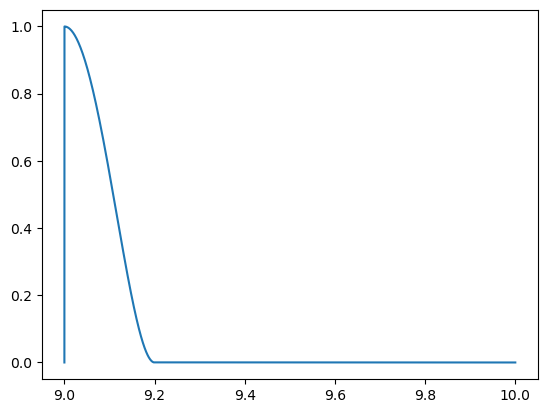

In [17]:
plt.close()
plt.plot(rr, psi_plus(rr, rin, delta_in))
plt.show()

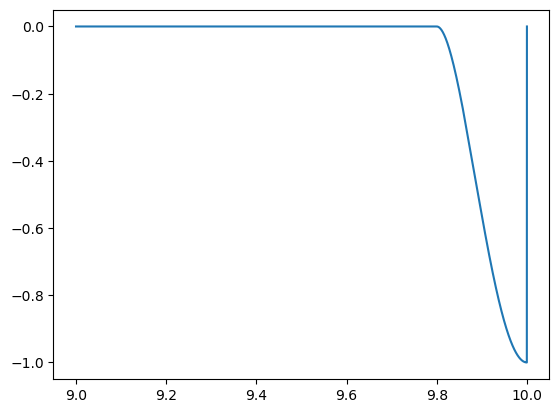

In [18]:
plt.close()
plt.plot(rr, -psi_minus(rr, r0, delta_C))
plt.show()

In [19]:
# OK that looks good...so make heating for CZ

In [20]:
shape1 = psi_plus(rr, rin, delta_in)
shape2 = psi_minus(rr, r0, delta_C)

fourpi = 4*np.pi
vol_cz = fourpi/3. * (r0**3-rin**3)
A_in = -1. / simps(fourpi*rr**2*shape1, rr) # remember rr is in decreasing order
A_C = -1. / simps(fourpi*rr**2*shape2, rr)

heating = A_in*shape1 - A_C*shape2

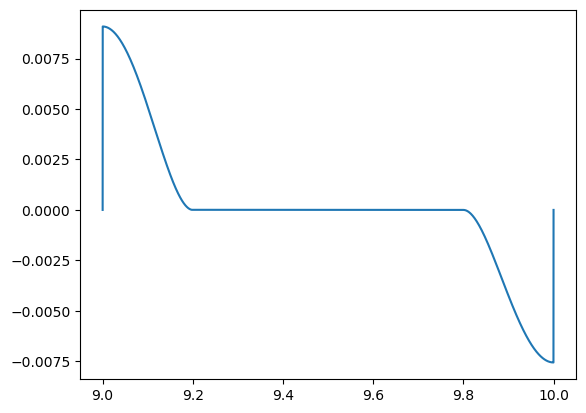

In [21]:
plt.close()
plt.plot(rr, heating)
plt.show()

In [22]:
print (simps(heating, rr))

-0.00016309289369359655


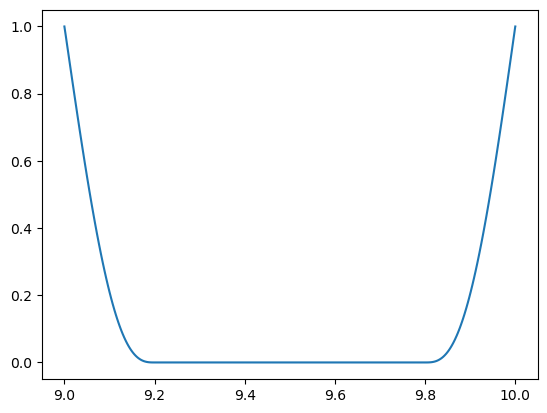

In [23]:
# and then compute radiative flux
flux_rad = 1. + integrate_from_r0(heating*fourpi*rr**2, rr, r0)
plt.close()
plt.plot(rr, flux_rad)
plt.show()

In [13]:
rr

array([10.        ,  9.99979996,  9.99959992, ...,  9.00040008,
        9.00020004,  9.        ])

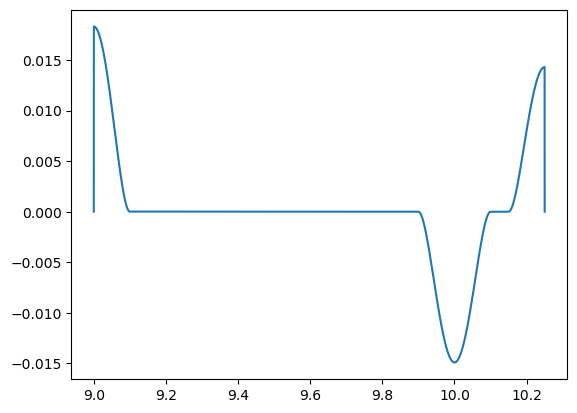

In [24]:
#okay now try WL up top
alpha = 0.25
beta = 0.9
delta_in = 0.1
delta_out = 0.1
delta_C = 0.1
flux_ratio = 1. 
nr = 5000
rin = beta/(1.-beta)
r0 = 1./(1.-beta)
rout = r0 + alpha
rr = np.linspace(rout, rin, nr) # make decreasing order for rr

shape1 = psi_plus(rr, rin, delta_in)
shape2 = psi_minus(rr, r0, delta_C) + psi_plus(rr, r0, delta_C)
shape3 = psi_minus(rr, rout, delta_out)

fourpi = 4*np.pi
A_in = -1. / simps(fourpi*rr**2*shape1, rr) # remember rr is in decreasing order
A_C = -(1. + flux_ratio) / simps(fourpi*rr**2*shape2, rr)
A_out = -flux_ratio / simps(fourpi*rr**2*shape3, rr)

heating = A_in*shape1 - A_C*shape2 + A_out*shape3

plt.close()
plt.plot(rr, heating)
plt.show()

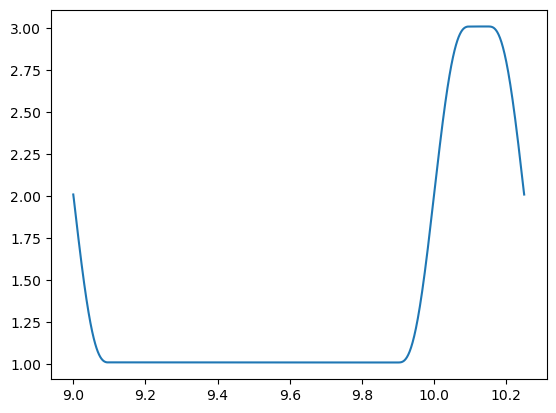

In [25]:
# and then compute radiative flux
flux_rad = 1. + flux_ratio +  integrate_from_r0(heating*fourpi*rr**2, rr, r0)
plt.close()
plt.plot(rr, flux_rad)
plt.show()

In [27]:
ir0 = np.argmin(np.abs(rr-r0))
print(flux_rad[0], flux_rad[ir0], flux_rad[-1])

2.0067937081090097 2.0 2.0071875832461386
